# EE 538: Low-Noise Analog Circuit Design
## Spring 2021
## Instructor: Jason Silver

## Announcements

 - Assignment 3 due Monday, April 26 at midnight
 - Assignment 4 will be posted Saturday, April 24

## Week 4

 - Motchenbacher Chapter 5
 - Art of Electronics Chapter 8

## Overview

 - Last time...
     - Hybrid-$\pi$ model
     - BJT noise model
     - BJT noise figure
     - Noise in common-emitter structures
 - Today...
     - FET large/small-signal operation
     - Thermal noise in FET devices
     - 1/f noise and gate current noise
     - FET noise model 
     - FET vs BJT

## Python packages/modules

In [23]:
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import ticker, cm
import numpy as np
from scipy import signal
from scipy import integrate
#%matplotlib notebook

mpl.rcParams['font.size'] = 14
mpl.rcParams['legend.fontsize'] = 'large'

def plot_xy(x, y, xlabel, ylabel):
    fig, ax = plt.subplots(figsize=(10.0, 7.5));
    ax.plot(x, y, 'b')
    ax.grid()
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
def plot_xy2(x1, y1, x1label, y1label, x2, y2, x2label, y2label):
    fig, ax = plt.subplots(2, figsize = (10.0, 7.5));
    ax[0].plot(x1, y1, 'b')
    ax[0].set_ylabel(y1label)
    ax[0].grid()
    
    ax[1].plot(x2, y2, 'b')
    ax[1].set_xlabel(x1label)
    ax[1].set_xlabel(x2label)
    ax[1].set_ylabel(y2label)
    ax[1].grid()
    
    fig.align_ylabels(ax[:])

def plot_xy3(x, y1, y2, y3, xlabel, y1label, y2label, y3label):
    fig, ax = plt.subplots(3, figsize=(10.0,7.5))
    
    ax[0].plot(x, y1)
    ax[0].set_ylabel(y1label)
    ax[0].grid()
    
    ax[1].plot(x, y2)
    ax[1].set_ylabel(y2label)
    ax[1].grid()
    
    ax[2].plot(x, y3)  
    ax[2].set_ylabel(y3label)
    ax[2].set_xlabel(xlabel)
    ax[2].grid()
    
def plot_logxy3(x, y1, y2, y3, xlabel, y1label, y2label, y3label):
    fig, ax = plt.subplots(3, figsize=(10.0,7.5))
    
    ax[0].semilogx(x, y1)
    ax[0].set_ylabel(y1label)
    ax[0].grid()
    
    ax[1].semilogx(x, y2)
    ax[1].set_ylabel(y2label)
    ax[1].grid()
    
    ax[2].semilogx(x, y3)  
    ax[2].set_ylabel(y3label)
    ax[2].set_xlabel(xlabel)
    ax[2].grid()

def plot_logxy(x, y, xlabel, ylabel):
    fig, ax = plt.subplots(figsize=(10.0, 7.5))
    ax.semilogx(x, y, 'b')
    ax.grid();
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)    
    
def plot_log3xy(x, y1, y2, y3, xlabel, ylabel, y1label, y2label, y3label):
    fig, ax = plt.subplots(figsize=(10.0,7.5))
    
    ax.semilogx(x, y1, 'b', label=y1label)
    ax.semilogx(x, y2, 'r', label=y2label)
    ax.semilogx(x, y3, 'g', label=y3label)  
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    ax.grid()    
    
    ax.legend()
    ax.legend(loc='upper center', ncol=3, fancybox=True, 
               shadow=True, bbox_to_anchor=(0.5,1.13) )  
    
def plot_log2xy(x, y1, y2, xlabel, ylabel, y1label, y2label):
    fig, ax = plt.subplots(figsize=(10.0,7.5))
    
    ax.semilogx(x, y1, 'b', label=y1label)
    ax.semilogx(x, y2, 'r', label=y2label)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    ax.grid()    
    
    ax.legend()
    ax.legend(loc='upper center', ncol=2, fancybox=True, 
               shadow=True, bbox_to_anchor=(0.5,1.13) )  
    
def plot_loglog(x, y, xlabel, ylabel):
    fig, ax = plt.subplots(figsize=(10.0, 7.5))
    ax.loglog(x, y, 'b')
    ax.grid();
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
    
def plot_loglog2(x, y1, y2, xlabel, ylabel, y1label, y2label):
    fig, ax = plt.subplots(figsize=(10.0,7.5))
    
    ax.loglog(x, y1, 'b', label=y1label)
    ax.loglog(x, y2, 'r', label=y2label)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    ax.grid()    
    
    ax.legend()
    ax.legend(loc='upper center', ncol=2, fancybox=True, 
               shadow=True, bbox_to_anchor=(0.5,1.13) )  
    
def plot_xlogy(x, y, xlabel, ylabel):
    fig, ax = plt.subplots(figsize=(10.0, 7.5));
    ax.semilogy(x, y, 'b');
    ax.grid();
    ax.set_xlabel(xlabel);
    ax.set_ylabel(ylabel);
    
def read_ltspice_ac(file_name):
    with open(file_name, 'r') as data:
        x = []
        y = []
        z = []
        next(data) # skip header line
        for line in data:
            p = line.split()
            x.append(float(p[0]))
            complex = p[1].split(",")
            y.append(float(complex[0]))
            z.append(float(complex[1]))

    return x, y, z

def plot_logxy2(x1, y1, x2, y2, x1label, y1label, x2label, y2label):
    fig, ax = plt.subplots(2, figsize = (10.0, 7.5));
    ax[0].semilogx(x1, y1, 'b');
    ax[0].set_ylabel(y1label)
    ax[0].grid()
    
    ax[1].semilogx(x2, y2, 'b');
    ax[1].set_xlabel(x1label)
    ax[1].set_xlabel(x2label);
    ax[1].set_ylabel(y2label);
    ax[1].grid();
    
    fig.align_ylabels(ax[:])
    
def plot_noise_bandwidth(f, mag):
    fig, ax = plt.subplots(2, figsize=(10.0,7.5))
    ax[0].semilogx(f, RC_mag)
    ax[0].set_xscale("log")
    ax[0].set_xlim(f[0], f[-1])
    ax[0].set_xticks(np.logspace(0.1,4,5))
    ax[0].set_xticklabels([])
    ax[0].set_ylabel('Magnitude [V/V]')
    ax[0].set_title('Equivalent Noise Bandwidth')
    ax[0].grid()

    ax[1].hlines(1, 0, f_enb, color='tab:blue')
    ax[1].hlines(0, f_enb, f[-1], color='tab:blue')
    ax[1].vlines(f_enb, 0, 1, color='tab:blue')
    ax[1].set_xlim(f[0], f[-1])
    ax[1].set_xscale("log")
    ax[1].set_xticks(np.logspace(0.1,4,5))
    ax[1].set_xticklabels([r'$10^0$',r'$10^1$', r'$10^2$', r'$10^3$', r'$10^4$'])
    ax[1].set_ylabel('Magnitude [V/V]')
    ax[1].set_xlabel('Frequency [Hz]')
    ax[1].grid()
    
def noise_hist(vnoise, vn_rms, bins):
    fig = plt.figure( figsize=(10.0,7.5) )
    vn_norm = vnoise/ vn_rms
    ax = fig.add_subplot(111)
    n, bins, rectangles = ax.hist(vn_norm, bins, density=True, range=(-3, 3),
                                 color='b')
    ax.set_xlabel(r'Sample Voltage [$v_{n(rms)}$]')
    ax.set_ylabel('Probability Density')
    ax.grid()
    fig.canvas.draw()

def plot_NF_vs_Rs(en_vals, in_vals, Rs_min, Rs_max, T_in_K):
    fig, ax = plt.subplots(figsize=(10.0, 7.5))
    k = 1.38e-23
    Rs = np.logspace(np.log10(Rs_min), np.log10(Rs_max), num=200)
    F1 = 1 + (en_vals[0]**2+Rs**2*in_vals[0]**2)/(4*k*T_in_K*Rs)
    F2 = 1 + (en_vals[1]**2+Rs**2*in_vals[1]**2)/(4*k*T_in_K*Rs)
    F3 = 1 + (en_vals[2]**2+Rs**2*in_vals[2]**2)/(4*k*T_in_K*Rs)
    ax.semilogx(Rs, 10*np.log10(F1), 'b', label=r'$e_{n1}$, $i_{n1}$')
    ax.semilogx(Rs, 10*np.log10(F2), 'r', label=r'$e_{n2}$, $i_{n2}$')
    ax.semilogx(Rs, 10*np.log10(F3), 'g', label=r'$e_{n3}$, $i_{n3}$')
    ax.grid();
    ax.set_xlabel(r'Source Resistance $R_s [\Omega]$')
    ax.set_ylabel(r'Noise Figure $NF$ [$dB$]')  
    
    ax.legend()
    ax.legend(loc='upper center', ncol=3, fancybox=True, 
               shadow=True, bbox_to_anchor=(0.5,1.13) )  
    
def plot_noise_curve(e_n, i_n, Rs_min, Rs_max):
    fig, ax = plt.subplots(figsize=(10.0, 7.5))
    Rs = np.logspace(np.log10(Rs_min), np.log10(Rs_max), num=200)
    e_ni_2 = 4*k*T*Rs + e_n**2 + i_n**2*Rs**2
    ax.loglog(Rs, np.sqrt(e_ni_2), 'b', label='Total Noise')
    ax.loglog(Rs, np.sqrt(4*k*T*Rs), 'r', label=r'$\sqrt{4kTR_s}$')
    ax.loglog(Rs, e_n*np.ones(np.size(Rs)), 'g', label=r'$e_n$')
    ax.loglog(Rs, i_n*Rs, 'y', label=r'$i_n R_s$')
    ax.grid();
    ax.set_xlabel(r'Source Resistance $R_s [\Omega]$')
    ax.set_ylabel(r'Equivalent Input Noise [$V/\sqrt{Hz}$]')
    
    ax.legend()
    ax.legend(loc='upper center', ncol=4, fancybox=True, 
               shadow=True, bbox_to_anchor=(0.5,1.13) )   
    
def plot_bjt_NF(beta, r_bb, Rmin, Rmax, Imin, Imax):
    fig, ax = plt.subplots(figsize=(10.0, 7.5))
    k = 1.38e-23
    T = 300
    q = 1.602e-19
    V_T = k*T/q
    rs = np.logspace(np.log10(Rmin), np.log10(Rmax), num = 100)
    ic = np.logspace(np.log10(Imin), np.log10(Imax), num = 100)
    I_C, R_S = np.meshgrid(ic, rs)
    e_n_2 = 4*k*T*(V_T/2/I_C + r_bb)
    i_n_2 = 2*q*I_C/beta_0
    NF = 1 + (e_n_2 + i_n_2*R_S**2)/(4*k*T*R_S)
    cp = ax.contourf(I_C, R_S, 10*np.log10(NF), levels=np.linspace(0,15, num=16))
    plt.xscale('log')
    plt.yscale('log')
    plt.ylabel(r'Source Resistance $R_s$ [$\Omega$]')
    plt.xlabel(r'Collector Current $I_C$ [A]')
    fig.colorbar(cp)

In [2]:
def fftnoise(f):
    f = np.array(f, dtype='complex')
    Np = (len(f) - 1) // 2
    phases = np.random.rand(Np) * 2 * np.pi
    phases = np.cos(phases) + 1j * np.sin(phases)
    f[1:Np+1] *= phases
    f[-1:-1-Np:-1] = np.conj(f[1:Np+1])
    return np.fft.ifft(f).real

def band_limited_noise(min_freq, max_freq, samples=1024, samplerate=1):
    freqs = np.abs(np.fft.fftfreq(samples, 1/samplerate))
    f = np.zeros(samples)
    idx = np.where(np.logical_and(freqs>=min_freq, freqs<=max_freq))[0]
    f[idx] = 1
    return fftnoise(f)

# Lecture 4 - Noise in Field Effect Transistors

## MOSFET operation (NMOS)

<center><img src="img/MOSFET_operation.png" width=700 /></center>

 - $V_{gs} > V_{th}$ creates a vertical electric field attracting minority carriers from the source/drain to form a conductive channel in the bulk region (i.e. the conductivity of the channel is controlled by $V_{gs}$)
 
 - $V_{ds} > 0$ generates an lateral electric field causing electrons in the channel to drift from source to drain
 
 - Saturation occurs for $V_d > V_{ov} = V_{gs} - V_{th}$, at which point the drain current magnitude is predominantly determined by $V_{gs}$ and the effect of $V_{ds}$ on $I_d$ is reduced


## MOSFET large-signal model

<center><img src="img/MOS_transistor.png" width=300 /></center>

$$I_d = \frac{1}{2}\mu C_{ox}\frac{W}{L}(V_{gs} - V_{th})^2(1+\lambda V_{ds}) $$

\begin{align} I_g = 0 && I_s = I_d
\end{align}

$$ V_{gs} = \sqrt{\dfrac{2I_d}{\mu C_{ox}\frac{W}{L}}} + V_{th}$$

 - In saturation drain current ($I_d$) is a quadratic function of $V_{gs}$ and (secondarily) a linear function of $V_{ds}$
 
 - $I_g = 0$ at DC and increases with frequency due to gate oxide capacitance
 
 - If $I_d$ is the independent variable (assuming $\lambda = 0$), $V_{gs}$ varies as the square root of $I_d$


 - If derived from first principles (and neglecting channel-length modulation), the long-channel drain current expression of the MOSFET can be expressed as 
 
\begin{equation}
I_d = \dfrac{1}{2}\mu C_{ox}\dfrac{W}{L}(V_{gs} - V_{th})^2
\end{equation}

 - This expression can be decomposed into the effects of 2 electric fields. The first is a vertical electric field that controls the channel charge:
 
\begin{equation}
C_{ox}W(V_{gs} - V_{th})
\end{equation}

 - The second field is the lateral field that controls charge velocity ($v= \mu E$), assuming the potential at the edge of the channel is equal to $V_{gs} - V_{th}$

\begin{equation}
\mu \dfrac{(V_{gs} - V_{th})}{L}
\end{equation}

## FET small-signal model

<center><img src="img/MOS_small_signal.png" width=700 /></center>

\begin{equation}
g_m \equiv \dfrac{\partial I_D}{\partial V_{GS}} = \dfrac{2I_D}{V_{gs}-V_{th}} = \dfrac{2I_D}{V_{ov}} 
\end{equation}

\begin{equation}
r_o \equiv \dfrac{\partial V_{DS}}{\partial I_D} = \dfrac{1}{\lambda I_D}
\end{equation}

 - The transconductance $g_m$ is the derivative of drain current with respect to gate-source voltage

 - $r_o$ is the small-signal output resistance of the transistor which captures the dependence of $i_d$ on $v_{gs}$
 
 - $r_o$ is primarily associated with the phenomenon of *channel-length modulation*, the influence of the drain voltage on the effective length of the channel


## FET capacitances

<center><img src="img/MOS_small_signal.png" width=700 /></center>

\begin{equation}
C_{gs} = \dfrac{2}{3}WLC_{ox}
\end{equation}

\begin{equation}
C_{gd} = WC_{ov}
\end{equation}

 - The high frequency behavior of the FET, like that of the BJT, is governed by two primary capacitances $C_{gs}$ and $C_{gd}$
 
 - In strong inversion $C_{gs}$ assumes the majority of the the total gate oxide capacitance ($WLC_{ox}$, where $[C_{ox}] = F/m^2$)
 
 - $C_{gd}$ comprises the "overlap" capacitance arising along the edge of the gate-drain interface ($[C_{ov}] = F/m$)
 
 - In most practical cases of interest, $C_{gs} \gg C_{gd}$, though $C_{gd}$ can play a significant role due to a phenomenon known as the "Miller effect" in which the apparent capacitance contributed by $C_{gd}$ is "amplified" by the voltage gain of the transistor/amplifier 

## FET transit frequency

<center><img src="img/MOS_transit_frequency.png" width=500 /></center>

 - The FET transit frequency $f_T$ is defined as the frequency at which the short-circuit current gain is unity:
 
\begin{equation}
f_T = \dfrac{g_m}{2\pi \cdot (C_{gs} + C_{gd})}
\end{equation}

 - $f_T$ constitutes the maximum frequency at which the transistor is able to provide power gain - beyond this frequency, it loses its utility as a gain device
 
 - As with the BJT, $f_T$ increases with $I_D$, with more power being required to operate at higher speeds

 - Transit frequency often serves as a technology characterization metric, and is a useful means of comparing different devices/technologies
 
 - Assuming $C_{gs} \gg C_{gd}$, the transit frequency of the MOSFET in strong inversion can be expressed as
 
\begin{equation}
f_T = \dfrac{g_m}{2\pi \cdot (C_{gs} + C_{gd})} \approx \dfrac{\mu C_{ox}(W/L)(V_{gs} - V_{th})}{2\pi\cdot(2/3)\cdot WLC_{ox}} = \dfrac{3}{2}\dfrac{\mu\cdot(V_{gs}-V_{th})}{2\pi\cdot L^2}
\end{equation}

 - From this expression we gather that the speed of a MOS device depends significantly on the gate length, and to a lesser extent, on mobility and overdrive voltage

## MOSFET as a resistance/switch

 - In linear/triode operation, the drain current is heavily influenced by the modulation of the lateral electric field with $V_{ds}$ and can be expressed as
 
\begin{equation}
I_d = \mu C_{ox}\left(\dfrac{W}{L}\right)\left[(V_{gs} - V_{th})V_{ds} - \dfrac{V_{ds}^2}{2}\right]
\end{equation}

 - For $V_{ds} \ll V_{gs} - V_{th}$, this can be approximated by a linear function in $V_{ds}$
 
\begin{equation}
I_d \approx \mu C_{ox}\left(\dfrac{W}{L}\right)(V_{gs} - V_{th})V_{ds}
\end{equation}

 - From this expression we can defined an effective resistance given by
 
\begin{equation}
r_{ds} = \dfrac{1}{\mu C_{ox}\left(\dfrac{W}{L}\right)(V_{gs} - V_{th})}
\end{equation}

 - This is the expression typically used to describe MOS behavior when operated as a switch

## JFET operation (NFET)

<center><img src="img/JFET_operation.png" width=700 /></center>

 - $V_g \leq 0$ reverse-biases the gate-channel junction and modulates the conductivity of the channel by increasing/decreasing the width of the depletion region(s)

 - $V_{d} > 0$ produces a lateral electric field and causes majority carriers (electrons in this case) to drift between source and drain, in addition to modulating the depletion region width near the drain

 - Saturation occurs for  $V_d > V_P$, where $V_P$ is referred to as the "pinch-off" voltage, at which point $V_d$ has diminished influence on the field experienced by mobile charge carriers in the non-depleted region of the channel

## JFET operation

<center><img src="img/JFET_transistor.png" width=300 /></center>

$$I_d = I_{DSS}\left(1-\dfrac{V_{gs}}{V_p}\right)^2 $$

$$g_m = \dfrac{2I_{DSS}}{V_p}\left(1-\dfrac{V_{gs}}{V_p} \right)$$

 - In saturation, drain current ($I_d$) is a quadratic function of $V_{gs}$ 
 
 - $I_g \neq 0$ at DC, but because the junction is reverse-biased it is small at low frequencies
 
 - $V_p$ is referred to as the "pinch-off" voltage, the value of $V_{gs}$ at which the channel thickness goes to zero

## FET channel noise

<center><img src="img/MOSFET_operation.png" width=700 /></center>

<center><img src="img/JFET_operation.png" width=700 /></center>

 - The primary noise mechanism in the MOSFET (and JFET) is the thermally-induced movement of mobile charge carriers in the channel
 
 - In the MOSFET, the channel charge is modulated by an electric field that attracts minority carriers from the source and drain to the region of the bulk directly under the gate
 
 - In the JFET, the applied gate voltage increases/decreases the width of the depletion layer(s) near the gate contact(s), decreasing/increasing the effective height of the channel and modulating the conductivity
 
 - In this sense, prior to saturation, both devices can be viewed as resistances whose magnitude is controlled by the gate voltage

## Thermal noise in a resistor

 - The mean-square current spectral density of noise due to thermal fluctuation of charge carriers in a resistance $R$ is expressed as
 
\begin{equation}
i_n^2 = \dfrac{4kT}{R} \; A^2/Hz
\end{equation}

 - Resistance can be expressed in terms of material parameters $\mu_c$ (carrier mobility) and $n_c$ (carrier concentration), legnth $L$, and cross-sectional area $A$
 
\begin{equation}
R = \dfrac{L}{\sigma A} = \dfrac{L}{q n_c \mu_c A}
\end{equation}

 - The *total charge* in the volume defined by $A\cdot L$ is given by
 
\begin{equation}
Q_{tot} = qn_cAL
\end{equation}

 -  The spectral density of the noise can be expressed in terms of the total charge as
 
\begin{equation}
i_n^2 = \dfrac{4kT}{dR}  = 4kT \dfrac{q n_c \mu_c A}{L} = 4kT \dfrac{\mu_cQ_{tot}}{L^2}\; A^2/Hz
\end{equation} 

## MOSFET channel charge

<center><img src="img/MOSFET_channel_charge_linear.png" width=700 /></center>

<center><img src="img/MOSFET_channel_charge_saturation.png" width=700 /></center>

 - The inversion charge in the conducting channel of a MOSFET is a function of the gate capacitance $C_{ox}$ and the applied voltage (above threshold) $V_{gs} - V_{th}$
 
 - In the linear mode of operation, when $V_{ds} \ll V_{gs} - V_{th}$ the capacitance and charge are approximately uniform along the channel and the charge is given by $Q_{lin} = WLC_{ox}(V_{gs} - V_{th})$

 - In saturation, the capacitance is non-uniform between the source and drain and the total charge can be approximated as $Q_{sat} = \frac{2}{3}WLC_{ox}(V_{gs} - V_{th})$
 

## Channel thermal noise

 - In triode/linear operation, the spectral density of the thermal noise can be expressed in terms of the channel charge as

\begin{equation}
i_{nd}^2 =  4kT \dfrac{\mu Q_{lin}}{L^2} = 4kT \mu C_{ox} \dfrac{W}{L} (V_{gs} - V_{th}) \; A^2/Hz
\end{equation} 

 - The noise is often expressed in terms of $g_{d0}$, the derivative of the drain current with respect to $V_{ds}$ when $V_{ds} = 0$:
 
\begin{equation}
g_{d0} \equiv \dfrac{dI_{d}}{d V_{ds}}\biggr\rvert_{V_{ds} = 0} = \mu C_{ox} \dfrac{W}{L} (V_{gs} - V_{th})
\end{equation}

 - This gives
 
\begin{equation}
i_{nd}^2 = 4kT \mu C_{ox} \dfrac{W}{L} (V_{gs} - V_{th})  = 4kTg_{d0}\; A^2/Hz
\end{equation}  

 - In saturation the drain current noise can be expressed as

\begin{equation}
i_{nd}^2 =  4kT \dfrac{\mu Q_{sat}}{L^2} = 4kT \gamma g_{d0} \; A^2/Hz
\end{equation} 

 - It is often assumed that $g_m \approx g_{d0}$, resulting in the common expression

\begin{equation}
i_{nd}^2 = 4kT \gamma g_{m} \; A^2/Hz
\end{equation} 

 - The factor $\gamma$ is sometimes called the "excess noise factor" and is typically taken to be $\frac{2}{3}$ for long-channel devices
 
 - Particularly for shorter channel lengths (i.e. $L \ll 10\mu m$), velocity saturation and other effects cause an increase in the observed noise, resulting in excess noise factors as high as $2-3$

## JFET thermal noise

<center><img src="img/AoE_JFET_thermal_noise.png" width=700 /></center>

 - Measured noise of discrete JFETs shows decent conformity to the to the $\gamma = \frac{2}{3}$ prediction at frequencies well above the $1/f$ corner
 
 - *Figure source: Art of Electronics, Third Edition*

## 1/f noise

- MOSFET drain current exhibits $1/f$ noise due to the trapping/release of charge carriers primarily at the $\text{Si}-\text{SiO}_2$ interface, producing current noise with a $1/f$ characteristic
 
\begin{equation}
i_{nf}^2 = \dfrac{K_f}{f}\cdot\dfrac{g_m^2}{WLC_{ox}}
\end{equation}

 - $1/f$ noise in MOSFETs can be reduced by increasing gate area (as seen in the above expression), though this comes at the expense of increased gate capacitance and a reduced $f_T$
 
 - $1/f$ noise corners for MOSFETs are substantially higher that those of BJT's, and this tends to be limiting factor when considering their use at low frequencies
 
 - JFET's also exhibit $1/f$ noise, though this tends to be more subdued than in MOSFET's
 
 - Many devices produce low-frequency noise that does not neatly conform to the $1/f$ model, and in these cases it is common to see noise reported as integrated or peak-to-peak noise within a given frequency range 

## BJT, MOSFET, JFET 1/f comparison

<center><img src="img/AoE_BJT_MOSFET_JFET.png" width=1000 /></center>

 - At low to moderate frequencies, the high $1/f$ noise corners of MOSFETs makes them far inferior to both BJT and JFET devices
 
 - *Figure source: Art of Electronics, Third Edition*

## Gate current shot noise

- Gate current in FETs is due to charge leakage through the silicon dioxide gate to the source region, and can be expressed as
 
\begin{equation}
i_{ng}^2 = 2qI_G
\end{equation}

 - MOSFET gate current is typically extremely small (measured in $\text{fA}$), so this noise current is in most cases negligible

 - JFET gate current is due to the leakage current of the reverse-biased $pn$ junction comprising the gate, and tends to be somewhat higher than that of the MOSFET
 
 - Both 

## Miller effect

<center><img src="img/Miller_theorem.png" width=1100 /></center>

 - Another source of gate current noise can be explained with the help Miller's theorem, which decomposes the impedance between the input and output nodes of an inverting votlage amplifier ($Z$) into equivalent input and output impedances to ground ($Z_1$ and $Z_2$)
 
 - For a given input voltage $v_i$, the gain of the amplifier increases the effective current through $Z$, lowering the impedance "seen" by the input voltage
 
 - Using Miller's theorem it can be shown that $Z_1 = Z/(1+A_v)$ 

## Excess input current noise

 - Assuming a feedback capacitance $C_{fb}$ and a voltage gain of $g_m Z_L$, where $Z_L$ is the parallel combination of $R_L$ and $C_L$, it can be shown that the effective input admittance $Y_1 = 1/Z_1$ due to the Miller effect is given by
 
\begin{equation}
Y_1 = \dfrac{-\omega^2R_LC_LC_{fb} + \omega^2C_{fb}(1+g_mR_L)R_LC_L+j\omega C_{fb}[1+g_mR_L+\omega^2R_L^2C_L^2]}{1+\omega^2R_L^2C_L^2}
\end{equation}

 - The real portion of $Y_1$ is given by
 
\begin{equation}
G_1 = \dfrac{1}{R_1} =  \dfrac{\omega^2g_mR_L^2C_{fb}C_L}{1+\omega^2R_L^2C_L^2} \; [\Omega^{-1}]
\end{equation}

 - This conductance/resistance is real, and thus produces thermal noise given by

\begin{equation}
i_n^2 = 4kTG_1 = 4kT\dfrac{\omega^2g_mR_L^2C_{fb}C_L}{1+\omega^2R_L^2C_L^2} \; A^2/Hz
\end{equation}
 

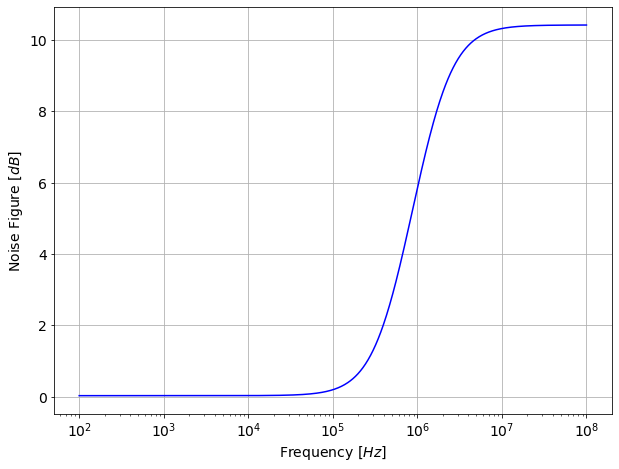

In [181]:
f = np.logspace(2,8,num=800)
w = 2*np.pi*f
gm = 10e-3
RL = 10e3
Rs = 10e3
CL = 10e-12
Cfb = 1e-12
G_1 = (w**2*gm*RL**2*Cfb*CL)/(1+w**2*RL**2*CL**2)
i_n = np.sqrt(2*q*10e-12 + 4*k*T*G_1)
e_n = 1e-9
e_ns = np.sqrt(4*k*T*Rs)
F = 1+(e_n**2+i_n**2*Rs**2)/(e_ns**2)
plot_logxy(f, 10*np.log10(F), r'Frequency [$Hz$]', r'Noise Figure [$dB$]') 

 - Using reasonable values for $g_m$, $C_L$, $R_L$, and $C_{fb}$, we see that the current noise starts to degrade the noise figure above $100kHz$, an effect which depends on the source resistance ($10k\Omega$ in this case)
 


## FET noise sources

<center><img src="img/FET_noise_model.png" width=1000 /></center>

 - FET drain current noise arises due to the resistivity of the channel and $1/f$ noise and is expressed as
 
\begin{equation}
 i_{nd}^2 = 4kT\gamma g_m \;\;\;\; i_{nf}^2 \dfrac{K_f}{f}\cdot\dfrac{g_m^2}{WLC_{ox}}
\end{equation}

 - FET gate current noise is primarily due to shot noise and thermal noise due to the Miller effect (only significant at high frequencies)
 
\begin{equation}
i_{ng}^2 =2qI_G + 4kT\dfrac{\omega^2g_mR_L^2C_{fb}C_L}{1+\omega^2R_L^2C_L^2}
\end{equation}


## FET equivalent noise model

<center><img src="img/FET_equivalent_noise_model.png" width=600 /></center>

 - The equivalent voltage noise is determined by reflecting the drain current noise through $g_m$:
 
\begin{equation}
e_n^2 = \dfrac{4kT\gamma}{g_m} + \dfrac{K_f}{f}\cdot\dfrac{1}{WLC_{ox}}
\end{equation}

 - The equivalent current noise is due both to gate leakage shot current and the Miller effect:
 
\begin{equation}
i_n^2 =2qI_G + 4kT\dfrac{\omega^2g_mR_L^2C_{fb}C_L}{1+\omega^2R_L^2C_L^2}
\end{equation}
 
 

## Voltage noise in FETs versus BJTs

 - At moderate frequencies FET input voltage noise is dominated by the thermal noise of the channel
 
\begin{equation}
i_{nd}^2 = 4kT\gamma g_m \rightarrow e_n^2 = \dfrac{i_{nd}^2}{g_m^2} = \dfrac{4kT\gamma}{g_m} = \dfrac{2kT\gamma}{I_D}\cdot V_{OV}
\end{equation}

 - Similarly, assuming $r_e/2 \gg r_b$, BJT voltage noise is dominated by collector current shot noise 

\begin{equation}
i_{nc}^2 = 2qI_C = 2kTg_m \rightarrow e_n^2 = \dfrac{i_{nc}^2}{g_m^2} = \dfrac{2kT}{g_m} = \dfrac{2kT}{I_C}\cdot V_T
\end{equation}

 - To compare the two device types, the concept of *transconductance efficiency* proves useful, the ratio of transconductance to device current

 - For the MOSFET, the transconductance efficiency in strong inversion is given by
 
\begin{equation}
\dfrac{g_m}{I_D} = \dfrac{2I_D/V_{ov}}{I_D} = \dfrac{2}{V_{ov}}
\end{equation}

 - Though $V_{ov}$ varies based on device fabrication and sizing, a representative range of values for moderate drain currents (i.e. milliamps) is $0.2 - 1\text{V}$, resulting in $g_m/I_D$ values from $2 - 10\; \text{S/A}$
 
 - For the BJT, trasconductance efficiency in the forward active mode is
 
\begin{equation}
\dfrac{g_m}{I_C} = \dfrac{1}{V_T} = \dfrac{q}{kT}
\end{equation}

 - At $300K$, $g_m/I_C \approx 40 \text{S/A} $, making BJT's far superior to FETs in terms of transconductance efficiency
 
 - To achieve higher values of $g_m/I_D$, FETs must be operated with lower current densities, increasing gate capacitance and impacting bandwidth/stability

 - Returning to the question of input voltage noise (still neglecting $r_b$), we have
 
\begin{equation}
e_{n,BJT}^2 = \dfrac{2kT}{g_m} \;\;\;\; e_{n,FET}^2 = \dfrac{4kT\gamma}{g_m}
\end{equation}

 - Using the concept of transconductance efficiency we can rewrite these expressions as
 
\begin{equation}
e_{n,BJT}^2 = \dfrac{2kT}{(g_m/I_C)\cdot I_C} \;\;\;\; e_{n,FET}^2 = \dfrac{4kT\gamma}{(g_m/I_D)\cdot I_D}
\end{equation}

 - As an example, assuming $I_D = I_C = 1mA$ and $g_m/I_D = 5\; \text{S/A}$ results in $e_{n,BJT} \approx 0.5 nV/\sqrt{Hz}$ and $e_{n,MOS} \approx 1.5 nV/\sqrt{Hz}$ 

 - For increased values of $f_T$, the required reduction in channel length results in an increase in the excess noise factor $gamma$, further increasing the gap between the two types of devices

 - As a result, for low to moderate source impedances (assuming small $r_b$), a BJTs typically significantly outperform MOSFETs

## Effect of source impedance

 - Assuming an ideal BJT (i.e. one with no base resistance or $1/f$ noise), we can compare the noise performance of BJT and FET devices

In [75]:
Rs = np.logspace(0, 6, num=600)
IC = 1e-3
ID = IC
beta = 400
r_b = 10
gm_over_ID = 5
gm_BJT = IC/(k*T/q)
gm_MOS = gm_over_ID*ID
in_BJT_2 = 2*q*IC/beta
en_BJT_2 = 4*k*T*r_b + 2*k*T/gm_BJT + in_BJT_2*Rs**2
en_MOS_2 = 4*k*T*gamma/gm_MOS*np.ones(np.size(Rs))

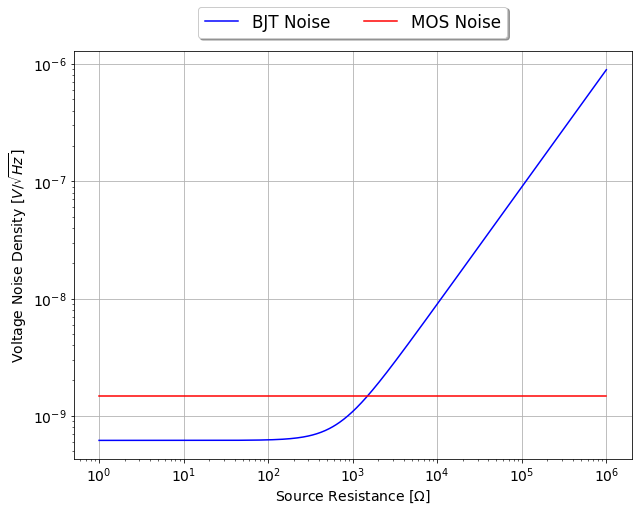

In [76]:
plot_loglog2(Rs, np.sqrt(en_BJT_2), np.sqrt(en_MOS_2), 
           r'Source Resistance [$\Omega$]', r'Voltage Noise Density [$V/\sqrt{Hz}$]',
           'BJT Noise', 'MOS Noise')

 - Thus,  for moderate currents, and depending on the values of $r_b$ and MOS $g_m/I_D$, BJT's tend be go-to devices for source resistances below a few $k\Omega$, and beyond this FETs will generally outperform

 - However, BJT's are superior devices in a number of other ways, including lower input capacitance for a given $g_m$, lower $1/f$ noise, and more stable/predictable characteristics

 - Let's take a look at how the two device types perform in terms of noise factor/figure...

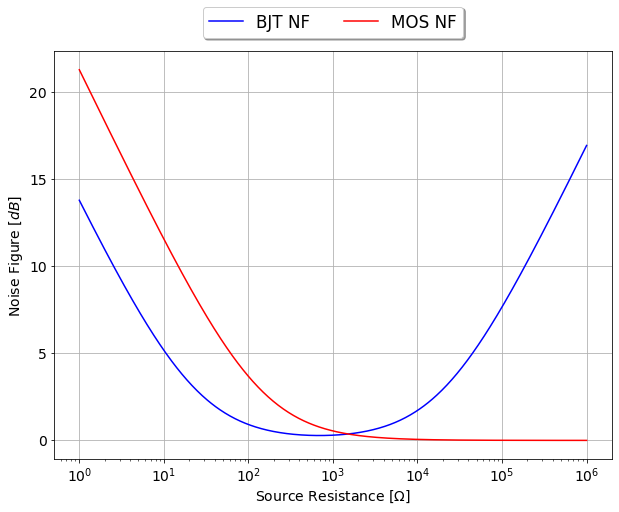

In [77]:
NF_BJT = 10*np.log10((en_BJT_2 + 4*k*T*Rs)/(4*k*T*Rs))
NF_MOS = 10*np.log10((en_MOS_2 + 4*k*T*Rs)/(4*k*T*Rs))

plot_log2xy(Rs, NF_BJT, NF_MOS, 
           r'Source Resistance [$\Omega$]', r'Noise Figure [$dB$]',
           'BJT NF', 'MOS NF')

 - Unsurprisingly, the BJT achieves a superior noise figure for moderate values of $R_s$, but suffers as $R_s$ increases
 
 - Why not just decrease collector current to increase $R_{opt}$ as $R_s$ increases?
 


## Other considerations

 - Let's assume we have a source with equivalent resistance $R_s = 1M\Omega$ and a signal bandwidth of $10kHz$. We could design our BJT amplifier such that $R_{opt} = R_s$. 
 
 - Recall that in the shot-noise-limited regime $R_{opt}$ is given by
 
\begin{equation}
R_{opt} \approx \dfrac{V_T}{I_C}\sqrt{\beta_0}
\end{equation}

 - Let $\beta_0 = 200$. Assuming we're operating at room temperature, the condition $R_{opt} = R_s$ requires
 
\begin{equation}
I_{C} \approx \dfrac{V_T}{R_{opt}}\sqrt{\beta_0} = 365nA
\end{equation}

 - Thes use of such low collector currents leads to precipitously low values of $f_T$, drastically reducing the usable frequency range of the device


## Summary

 - The primary noise mechanism in MOSFET and JFET devices is the thermal agitation of charge carriers in the channel 

 - Thermal noise density in MOSFETs depends on the excess noise factor $\gamma$, which has a minimum value of $\frac{2}{3}$ in saturation and can be $2-3$ times higher, particularly for high values of $f_T$
 
 - $1/f$ noise is more prounounced in FET devices relative to BJTs, particularly in MOSFETs due to defects at the oxide-silicon interface
  
 - Gate current noise in FETs is extremely low at low to moderate frequencies, but can increase substantially at high frequencies/temperatures
 
 - BJTs outperform FETs in terms of thermal noise, in part due to their higher transconductance efficiency, but FETs are generally superior for applications involving high source resistances
